# QOSF Quantum Mentorship Program - Task2

## Importing Packages

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.quantum_info.states import Statevector, partial_trace
from qiskit.visualization import *
from qiskit.tools.monitor import *
import numpy as np
from math import sqrt, pi
from random import choices
import random
import matplotlib.pyplot as plt

## Creating Bell State
The below circuit creates the Bell State $\dfrac{(|00>+|11>)}{\sqrt(2)}$

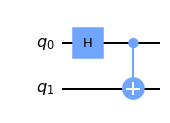

In [2]:
qcircB = QuantumCircuit(2) #Initializing quantum circuit with 2 Qubits
qcircB.h(0) #Applying Hadamard gate on q0
qcircB.cx(0,1) #Applying Control NOT gate on q1 with q0 as control
qcircB.draw(output='mpl') #Draw the circuit

## Getting the Statevector

(0.7071067811865476+0j)
0j
0j
(0.7071067811865476+0j)


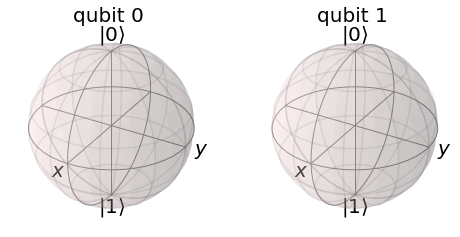

In [3]:
sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircB, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
for amplitude in v:
    print(amplitude)
plot_bloch_multivector(v)

The state of the above qubit pair represented by Bloch sphere is entangled & unknown unitil measurement

## Adding Measurement

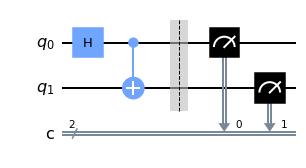

In [4]:
qcircBm = QuantumCircuit(2,2) #Initializing quantum circuit with 2 Qubits & 2 Classical Bits
qcircBm.h(0) #Applying Hadamard gate on q0
qcircBm.cx(0,1) #Applying Control NOT gate on q1 with q0 as control
qcircBm.barrier()
qcircBm.measure(0,0) #Measured output on classical bit1
qcircBm.measure(1,1) #Measured output on classical bit2
qcircBm.draw(output='mpl') #Draw the circuit

0j
0j
0j
(1+0j)


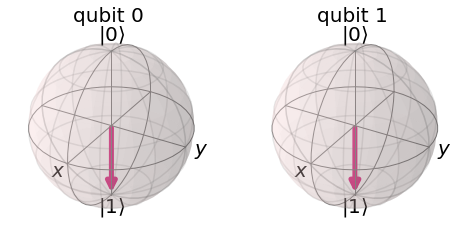

In [5]:
sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircBm, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
for amplitude in v:
     print(amplitude)
plot_bloch_multivector(v)

The measurement on any one of the qubit pair collapses the state to either $|00>$ or $|11>$ with 50% probability for each

## Running the Circuit on Simulators (To verify the Bell State created above)

{'00': 541, '11': 483}


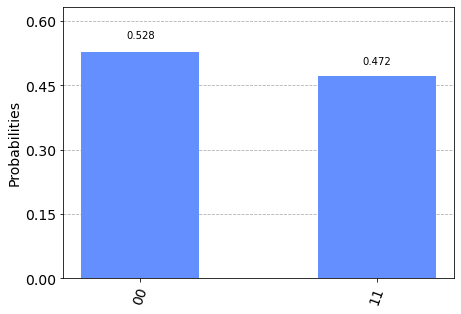

In [6]:
simBm = Aer.get_backend('qasm_simulator') #Choosing the QASM Simulator
job = execute(qcircBm, simBm, shots=1024) #Executing the circuit on simulator
result_sim = job.result() #Collecting results
counts = result_sim.get_counts(qcircBm) #Counting the frequency of each result
print(counts) 
plot_histogram(counts)

## Adding Error to the Qubits

- It should be noted that <b>Bit Flip</b> error to q0 will not affect the probability of final states because:
<br> q0 (|0>) --> [H] --> $\dfrac{(|0>+|1>)}{\sqrt(2)}$ --> [X] --> $\dfrac{(|1>+|0>)}{\sqrt(2)}$ which are equivalent. Hence this produces the equivalent Bell state $\dfrac{(|11>+|00>)}{\sqrt(2)}$ if we consider ideal Hadamard gate. Elsewise, final state will $\alpha$ |11>+ $\beta$ |00> instead of $\alpha$ |00>+ $\beta$ |11>. 

- It should be noted that <b>Phase Flip</b> error to q0 will not affect the robability of final states because:
<br> q0 (|0>) --> [H] --> $\dfrac{(|0>+|1>)}{\sqrt(2)}$ --> [Z] --> $\dfrac{(|0>-|1>)}{\sqrt(2)}$. This produces the Bell state $\dfrac{(|00>-|11>)}{\sqrt(2)}$, a different Bell state with same probability amplitudes but with a phase.

- It should be noted that <b>Phase Flip</b> error to q1 will not affect the result because:
<br> q1 (|0>) --> [Z] --> |0>. No change to q1 & hence this produces the same Bell state $\dfrac{(|00>+|11>)}{\sqrt(2)}$.

### Below are the combinations of error gates & the resultant outcomes

#### 1) [X][I]

Final State --> $\dfrac{(|11>+|00>)}{\sqrt(2)}$

(0.7071067811865476+0j)
0j
0j
(0.7071067811865476+0j)


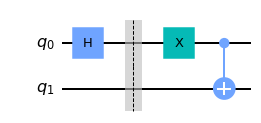

In [7]:
qcircXIe = QuantumCircuit(2) #Initializing quantum circuit with 2 Qubits
qcircXIe.h(0) #Applying Hadamard gate on q0
qcircXIe.barrier()
qcircXIe.x(0) #Adding error to q0
qcircXIe.cx(0,1) #Applying Control NOT gate on q1 with q0 as control

sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircXIe, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
for amplitude in v:
    print(amplitude)

qcircXIe.draw(output='mpl') #Draw the circuit

#### 2) [I][X]

Final State --> $\dfrac{(|01>+|10>)}{\sqrt(2)}$

0j
(0.7071067811865476+0j)
(0.7071067811865476+0j)
0j


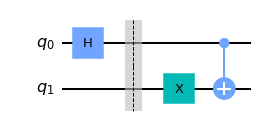

In [8]:
qcircIXe = QuantumCircuit(2) #Initializing quantum circuit with 2 Qubits
qcircIXe.h(0) #Applying Hadamard gate on q0
qcircIXe.barrier()
qcircIXe.x(1) #Adding error to q1
qcircIXe.cx(0,1) #Applying Control NOT gate on q1 with q0 as control

sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircIXe, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
for amplitude in v:
    print(amplitude)

qcircIXe.draw(output='mpl') #Draw the circuit

#### 3) [X][X]

Final State --> $\dfrac{(|10>+|01>)}{\sqrt(2)}$

0j
(0.7071067811865476+0j)
(0.7071067811865476+0j)
0j


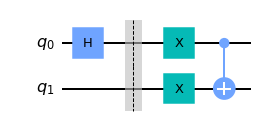

In [9]:
qcircXXe = QuantumCircuit(2) #Initializing quantum circuit with 2 Qubits
qcircXXe.h(0) #Applying Hadamard gate on q0
qcircXXe.barrier()
qcircXXe.x(0) #Adding error to q0
qcircXXe.x(1) #Adding error to q1
qcircXXe.cx(0,1) #Applying Control NOT gate on q1 with q0 as control

sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircXXe, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
for amplitude in v:
    print(amplitude)

qcircXXe.draw(output='mpl') #Draw the circuit

#### 4) [Z][I]

Final State --> $\dfrac{(|00>-|11>)}{\sqrt(2)}$

(0.7071067811865476+0j)
(-0+0j)
0j
(-0.7071067811865476+0j)


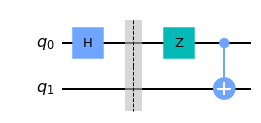

In [10]:
qcircZIe = QuantumCircuit(2) #Initializing quantum circuit with 2 Qubits
qcircZIe.h(0) #Applying Hadamard gate on q0
qcircZIe.barrier()
qcircZIe.z(0) #Adding error to q0
qcircZIe.cx(0,1) #Applying Control NOT gate on q1 with q0 as control

sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircZIe, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
for amplitude in v:
    print(amplitude)

qcircZIe.draw(output='mpl') #Draw the circuit

#### 5) [I][Z]

Final State --> $\dfrac{(|00>+|11>)}{\sqrt(2)}$

(0.7071067811865476+0j)
(-0+0j)
(-0+0j)
(0.7071067811865476+0j)


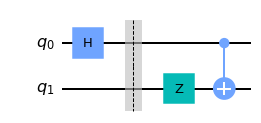

In [11]:
qcircIZe = QuantumCircuit(2) #Initializing quantum circuit with 2 Qubits
qcircIZe.h(0) #Applying Hadamard gate on q0
qcircIZe.barrier()
qcircIZe.z(1) #Adding error to q1
qcircIZe.cx(0,1) #Applying Control NOT gate on q1 with q0 as control

sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircIZe, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
for amplitude in v:
    print(amplitude)

qcircIZe.draw(output='mpl') #Draw the circuit

#### 6) [Z][Z]

Final State --> $\dfrac{(|00>-|11>)}{\sqrt(2)}$

(0.7071067811865476+0j)
-0j
(-0+0j)
(-0.7071067811865476+0j)


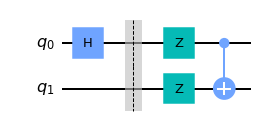

In [12]:
qcircZZe = QuantumCircuit(2) #Initializing quantum circuit with 2 Qubits
qcircZZe.h(0) #Applying Hadamard gate on q0
qcircZZe.barrier()
qcircZZe.z(0) #Adding error to q0
qcircZZe.z(1) #Adding error to q1
qcircZZe.cx(0,1) #Applying Control NOT gate on q1 with q0 as control

sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircZZe, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
for amplitude in v:
    print(amplitude)

qcircZZe.draw(output='mpl') #Draw the circuit

#### 7) [X][Z]

Final State --> $\dfrac{(|11>+|00>)}{\sqrt(2)}$

(0.7071067811865476+0j)
(-0+0j)
(-0+0j)
(0.7071067811865476+0j)


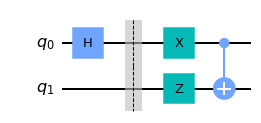

In [13]:
qcircXZe = QuantumCircuit(2) #Initializing quantum circuit with 2 Qubits
qcircXZe.h(0) #Applying Hadamard gate on q0
qcircXZe.barrier()
qcircXZe.x(0) #Adding error to q0
qcircXZe.z(1) #Adding error to q1
qcircXZe.cx(0,1) #Applying Control NOT gate on q1 with q0 as control

sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircXZe, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
for amplitude in v:
    print(amplitude)

qcircXZe.draw(output='mpl') #Draw the circuit

#### 8) [Z][X]

Final State --> $\dfrac{(|01>-|10>)}{\sqrt(2)}$

In [14]:
qcircZXe = QuantumCircuit(2) #Initializing quantum circuit with 2 Qubits
qcircZXe.h(0) #Applying Hadamard gate on q0
qcircZXe.barrier()
qcircZXe.z(0) #Adding error to q0
qcircZXe.x(1) #Adding error to q1
qcircZXe.cx(0,1) #Applying Control NOT gate on q1 with q0 as control

sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircZXe, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
for amplitude in v:
    print(amplitude)
#qcircZXe.draw(output='mpl') #Draw the circuit

0j
(-0.7071067811865476+0j)
(0.7071067811865476+0j)
(-0+0j)


## Verifying the probability code
To check whether the '**Choices**' function is inherently probablistic (specified probability) when called in loop with one output at a time vs one time population generation using specified probability

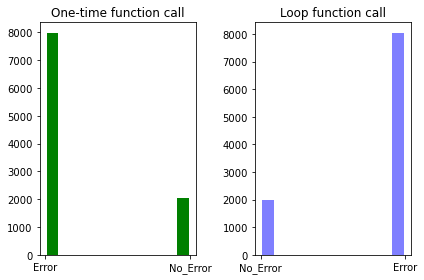

In [15]:
#Error
Pe=0.8 #Error Probability
Err_type=["No_Error","Error"] #Bins for probability
weights = [1-Pe, Pe] #Probability of each bin
Err_Gate1=choices(Err_type, weights, k=10000) #One time ditribution generation
Err_Gate2=[]
for i in range(10000): #Distribution over loop, one output per loop
 x=choices(Err_type, weights, k=1) #Randomly choose betweeen Error (Pe) or No Error (1-Pe) with respective probabilities
 Err_Gate2.extend(x)
#Plotting the 2 distribution histogram    
plt.subplot(1,2,1)    
plt.hist(Err_Gate1, color='g', rwidth=0.8)
plt.title("One-time function call", fontdict=None, loc='center', pad=None)
plt.subplot(1,2,2) 
plt.hist(Err_Gate2, color='b', alpha = 0.5, rwidth=0.8)
plt.title("Loop function call", fontdict=None, loc='center', pad=None)
plt.tight_layout()

We can see that the '**Choices**' function is inherently probabilistic when called at once or called over loop. Hence, we will proceed to use this model to add probabilistic error gate on our qubits 

## Bit Flip Code
#### 3qubit code:
Each qubit is encoded into 3 physical qubits with the property that it can correct a maximum of 1 bit flip that happens to any of the 3 extended bits. In the event of no flip or 1 flip, distance between the error state (eg: |010>) & the original state (eg: |000>) is 1 bit and closer to the original state. In the event of 2 or more flips, the original state becomes irrecoverable as its distance with other states becomes lesser to than that of original state.

The below code works for the error combinations [X][I], [I][X], & [X][X]

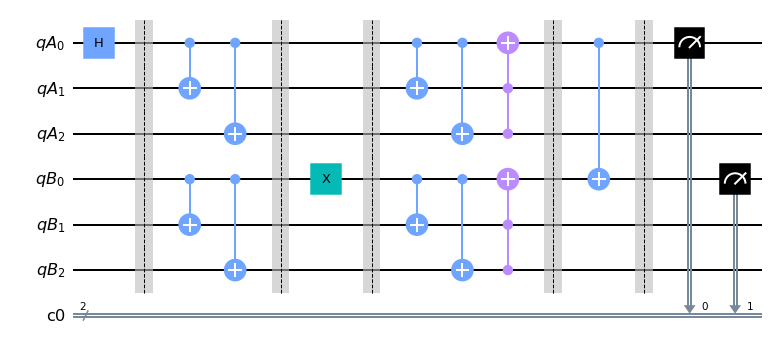

In [16]:
qA = QuantumRegister(3,'qA')
qB = QuantumRegister(3,'qB')
c = ClassicalRegister(2,'c0')

initial_state = [1, 0]

#Initalising the qubits (state |0> by default)
qcircBF = QuantumCircuit(qA,qB,c) #Initializing quantum circuit with 6 Qubits
#qcircBF.initialize(initial_state, 1) #Can use initialization if required
qcircBF.h(0) #Applying Hadamard gate on q0
qcircBF.barrier()

#Encoding Bit Flip code for qA0 & qB0 using 3 qubit line for each of them
qcircBF.cx(0,1) #Applying Control NOT gate on qA1 with qA0 as control
qcircBF.cx(0,2) #Applying Control NOT gate on qA2 with qA0 as control
qcircBF.cx(3,4) #Applying Control NOT gate on qB1 with qB0 as control
qcircBF.cx(3,5) #Applying Control NOT gate on qB2 with qB0 as control
qcircBF.barrier()

#Error
Pe=0.7 #Error Probability
Err_type=["No_Error","BitFlip"] #Flags to choose between Error types
weights = [1-Pe, Pe]
x=choices(Err_type, weights, k=1) #Randomly choose betweeen Error (70%) or No Error (30%) with respective probabilities
y=choices(Err_type, weights, k=1) #Randomly choose betweeen Error (70%) or No Error (30%) with respective probabilities
channelA=[0,1,2] #Channels or lines qA0, qA1, qA2
channelB=[3,4,5] #Channels or lines qB0, qB1, qB2
if x[0] == "BitFlip": #Add error to qA with probality Pe
 ch=random.choice(channelA) #Randomly choose oneof the lines qA0, qA1, or qA2 to add the error
 qcircBF.x(ch) #Adding 1 bit error to the randomly selected channel above
if y[0] == "BitFlip": #Add error to qB with probality Pe
 ch=random.choice(channelB) #Randomly choose oneof the lines qB0, qB1, or qB2 to add the error      
 qcircBF.x(ch) #Adding 1 bit error to the randomly selected channel above

qcircBF.barrier()

#Correction
qcircBF.cx(0,1) #Applying Control NOT gate on qA1 with qA0 as control
qcircBF.cx(0,2) #Applying Control NOT gate on qA2 with qA0 as control
qcircBF.cx(3,4) #Applying Control NOT gate on qB1 with qB0 as control
qcircBF.cx(3,5) #Applying Control NOT gate on qB2 with qB0 as control
qcircBF.ccx(1,2,0) #Applying Toffoli NOT gate on qA0 with qA1 & qA2 as control
qcircBF.ccx(4,5,3) #Applying Control NOT gate on qB0 with qB1 & qB2 as control
qcircBF.barrier()

#Entangling qubits qA0 & qB0
qcircBF.cx(0,3) #Applying Control NOT gate on qA0 with qB0 as control
qcircBF.barrier()

#Measurement of qA0 & qB0
qcircBF.measure(0,0) #Measured output on classical bit1
qcircBF.measure(3,1) #Measured output on classical bit2

sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircBF, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
#print(v)
#for amplitude in v:
#    print(amplitude)
qcircBF.draw(output='mpl') #Draw the circuit

*Devitt, Simon J., William J. Munro, and Kae Nemoto. "Quantum error correction for beginners." Reports on Progress in Physics 76.7 (2013): 076001.*

## Running the Bit Flip Code Circuit on Simulators

{'00': 515, '11': 509}


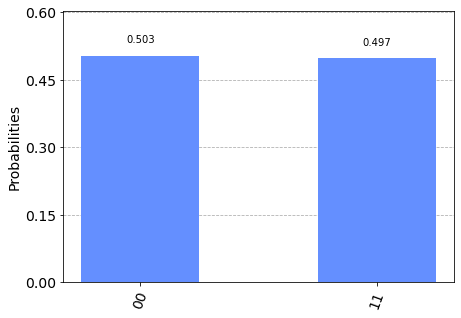

In [17]:
simBF = Aer.get_backend('qasm_simulator') #Choosing the QASM Simulator
job = execute(qcircBF, simBF, shots=1024) #Executing the circuit on simulator
result_sim = job.result() #Collecting results
counts = result_sim.get_counts(qcircBF) #Counting the frequency of each result
print(counts) 
plot_histogram(counts)

## Sign Flip Code
#### 3qubit code:
Each qubit is encoded into 3 physical qubits with the property that it can correct a maximum of 1 sign flip that happens to any of the 3 extended bits.

The below code works for the error combinations [Z][I], [I][Z], & [Z][Z]

[-9.47634627e-17+6.1232340e-17j  0.00000000e+00+0.0000000e+00j
  1.34692639e-17+6.1232340e-17j  0.00000000e+00+0.0000000e+00j
 -1.95815673e-17+6.1232340e-17j  0.00000000e+00+0.0000000e+00j
  1.00000000e+00-1.8369702e-16j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j -0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j -0.00000000e+00+0.0000000e+00j
  0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j]


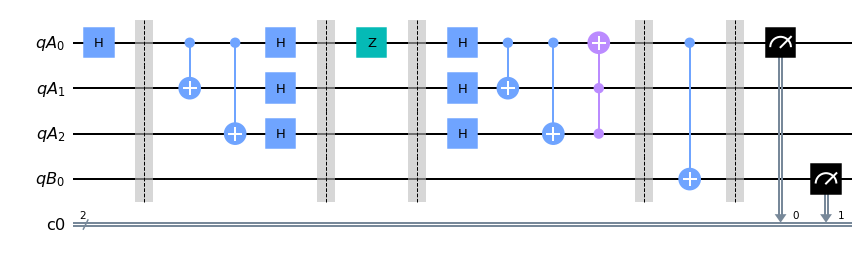

In [18]:
qA = QuantumRegister(3,'qA')
qB = QuantumRegister(1,'qB')
c = ClassicalRegister(2,'c0')

initial_state = [1, 0]

#Initalising the qubits (state |0> by default)
qcircSF = QuantumCircuit(qA,qB,c) #Initializing quantum circuit with 6 Qubits
#qcircSF.initialize(initial_state, 1) #Can use initialization if required
qcircSF.h(0) #Applying Hadamard gate on q0
qcircSF.barrier()

#Encoding Sign Flip code for qA0 & qB0 using 3 qubit line for qA0.
#Sign flip error will not affect qB0 (|0>) & hence qB0 requires no correction.
#For a relatively stable |0> to flip sign & impact the outcome,it should bitflip to +/- |1> first
#However, we are not accounting for bit flip & sign flip to occur simultaneously to 1 qubit
qcircSF.cx(0,1) #Applying Control NOT gate on qA1 with qA0 as control
qcircSF.cx(0,2) #Applying Control NOT gate on qA2 with qA0 as control
qcircSF.h(0) #Applying Hadamard on qA0
qcircSF.h(1) #Applying Hadamard on qA1
qcircSF.h(2) #Applying Hadamard on qA2
qcircSF.barrier()

#Error
Pe=0.7 #Error Probability
Err_type=["No_Error","SignFlip"] #Flags to choose between Error types
weights = [1-Pe, Pe]
x=choices(Err_type, weights, k=1) #Randomly choose betweeen Error (70%) or No Error (30%) with respective probabilities
y=choices(Err_type, weights, k=1) #Randomly choose betweeen Error (70%) or No Error (30%) with respective probabilities
channelA=[0,1,2] #Channels or lines qA0, qA1, qA2
channelB=[3] #Channel or line qB0
if x[0] == "SignFlip": #Add error to qA with probality Pe
 ch=random.choice(channelA) #Randomly choose oneof the lines qA0, qA1, or qA2 to add the error
 qcircSF.z(ch) #Adding 1 bit error to the randomly selected channel above
if y[0] == "SignFlip": #Add error to qB with probality Pe
 qcircSF.z(channelB) #Adding 1 bit error to qB0

qcircSF.barrier()    

#Correction
qcircSF.h(0) #Applying Hadamard on qA0
qcircSF.h(1) #Applying Hadamard on qA1
qcircSF.h(2) #Applying Hadamard on qA2
qcircSF.cx(0,1) #Applying Control NOT gate on qA1 with qA0 as control
qcircSF.cx(0,2) #Applying Control NOT gate on qA2 with qA0 as control
qcircSF.ccx(1,2,0) #Applying Toffoli NOT gate on qA0 with qA1 & qA2 as control
qcircSF.barrier()

#Entangling qubits qA0 & qB0
qcircSF.cx(0,3) #Applying Control NOT gate on qA0 with qB0 as control
qcircSF.barrier()

#Measurement of qA0 & qB0
qcircSF.measure(0,0) #Measured output on classical bit1
qcircSF.measure(3,1) #Measured output on classical bit2

sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircSF, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
print(v)
#for amplitude in v:
#    print(amplitude)
qcircSF.draw(output='mpl') #Draw the circuit

*Devitt, Simon J., William J. Munro, and Kae Nemoto. "Quantum error correction for beginners." Reports on Progress in Physics 76.7 (2013): 076001.*

## Running the Sign Flip Code Circuit on Simulators

{'00': 497, '11': 527}


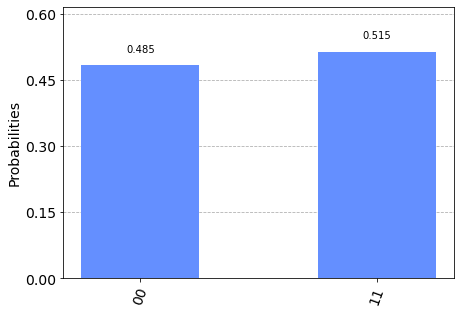

In [19]:
simSF = Aer.get_backend('qasm_simulator') #Choosing the QASM Simulator
job = execute(qcircSF, simSF, shots=1024) #Executing the circuit on simulator
result_sim = job.result() #Collecting results
counts = result_sim.get_counts(qcircSF) #Counting the frequency of each result
print(counts) 
plot_histogram(counts)

## Bit/Sign Flip Circuit (Without Correction)

0j
0j
(1+0j)
(-0+0j)


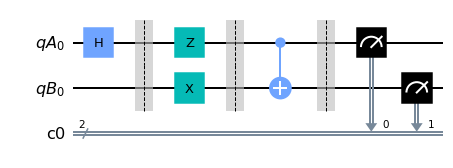

In [20]:
qA = QuantumRegister(1,'qA')
qB = QuantumRegister(1,'qB')
c = ClassicalRegister(2,'c0')

initial_state = [1, 0]

#Initalising the qubits (state |0> by default)
qcirce = QuantumCircuit(qA,qB,c) #Initializing quantum circuit with 6 Qubits
#qcirce.initialize(initial_state, 1) #Can use initialization if required
qcirce.h(0) #Applying Hadamard gate on q0
qcirce.barrier()

#Error
qcirce.z(0) #Adding 1 bit error to qA
qcirce.x(1) #Adding 1 bit error to qB
qcirce.barrier()

#Entangling qubits qA & qB
qcirce.cx(0,1) #Applying Control NOT gate on qA with qB as control
qcirce.barrier()

#Measurement of qA0 & qB0
qcirce.measure(0,0) #Measured output on classical bit1
qcirce.measure(1,1) #Measured output on classical bit2

sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcirce, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
for amplitude in v:
     print(amplitude)
qcirce.draw(output='mpl') #Draw the circuit

#### Plotting Bloch Sphere

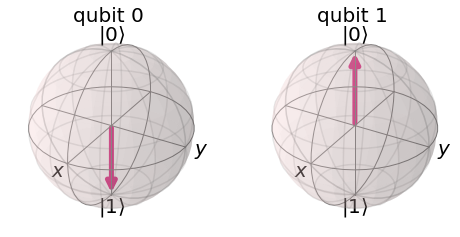

In [54]:
plot_bloch_multivector(v)

The final state produced by the above circuit can be seen is not the intended Bell State $\dfrac{(|00>+|11>)}{\sqrt(2)}$

## Bit/Sign Flip Circuit (With Correction)
#### Shor’s 9 qubit (bit or sign) code for qA:
1st qubit is encoded into 9 physical qubits with the property that it can correct a maximum of 1 bit or sign flip that happens to any of the 9 extended bits.

#### 3 qubit (bit flip) code for qB:
2nd qubit is encoded into 3 physical qubits with the property that it can correct a maximum of 1 bit flip only (as it is not vulnerable to sign flip) that happens to any of the 3 extended bits.

DensityMatrix([[0.5+0.0000000e+00j, 0. +0.0000000e+00j,
                0. +0.0000000e+00j, 0.5+1.8369702e-16j],
               [0. +0.0000000e+00j, 0. +0.0000000e+00j,
                0. +0.0000000e+00j, 0. +0.0000000e+00j],
               [0. +0.0000000e+00j, 0. +0.0000000e+00j,
                0. +0.0000000e+00j, 0. +0.0000000e+00j],
               [0.5-1.8369702e-16j, 0. +0.0000000e+00j,
                0. +0.0000000e+00j, 0.5+0.0000000e+00j]],
              dims=(2, 2))


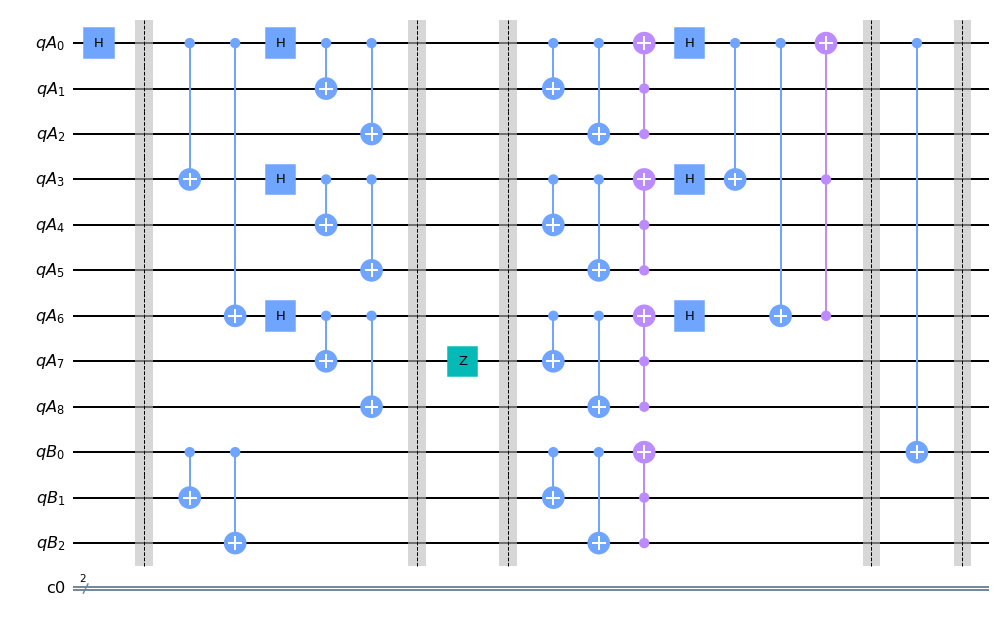

In [21]:
qA = QuantumRegister(9,'qA')
qB = QuantumRegister(3,'qB')
c = ClassicalRegister(2,'c0')

initial_state = [1, 0]

#Initalising the qubits (state |0> by default)
qcircE = QuantumCircuit(qA,qB,c) #Initializing quantum circuit with 6 Qubits
#qcircE.initialize(initial_state, 1) #Can use initialization if required
qcircE.h(0) #Applying Hadamard gate on q0
qcircE.barrier()

#Encoding for qA0
qcircE.cx(0,3) #Applying Control NOT gate on qA3 with qA0 as control
qcircE.cx(0,6) #Applying Control NOT gate on qA6 with qA0 as control
for i in range(0,8,3):
  qcircE.h(i)
  qcircE.cx(i,i+1)
  qcircE.cx(i,i+2)
qcircE.cx(9,10) #Applying Control NOT gate on qB1 with qB0 as control
qcircE.cx(9,11) #Applying Control NOT gate on qB2 with qB0 as control
qcircE.barrier()

#Error
Pe=0.7 #Error Probability
Err_type=["No_Error","BitFlip","SignFlip"] #Flags to choose between Error types
weights = [1-2*Pe, Pe, Pe]
x=choices(Err_type, weights, k=1) #Randomly choose betweeen Error (70%) or No Error (30%) with respective probabilities
y=choices(Err_type, weights, k=1) #Randomly choose betweeen Error (70%) or No Error (30%) with respective probabilities
channelA=[0,1,2,3,4,5,6,7,8] #Channels or lines qA0, qA1, qA2,.....qA8
channelB=[9,10,11] #Channel or line qB0
if x[0] == "BitFlip": #Add bit flip error to qA with probality Pe
 ch=random.choice(channelA) #Randomly choose oneof the lines qA0, qA1,.....qA8 to add the error
 qcircE.x(ch) #Adding 1 bit error to the randomly selected channel above
elif x[0]=="SignFlip": #Add sign flip error to qA with probality Pe
 ch=random.choice(channelA) #Randomly choose oneof the lines qA0, qA1,.....qA8 to add the error
 qcircE.z(ch) #Adding 1 bit error to the randomly selected channel above

if y[0] == "BitFlip": #Add bit flip error to qB with probality Pe
 ch=random.choice(channelB) #Randomly choose oneof the lines qB0, qB1,qB2 to add the error
 qcircE.x(ch) #Adding 1 bit error to [qB0, qB1, qB2]

qcircE.barrier()

#Correction
for i in range(0,8,3):
  qcircE.cx(i,i+1)
  qcircE.cx(i,i+2)
  qcircE.ccx(i+1,i+2,i)  
  qcircE.h(i)
qcircE.cx(0,3) #Applying Control NOT gate on qA3 with qA0 as control
qcircE.cx(0,6) #Applying Control NOT gate on qA6 with qA0 as control
qcircE.ccx(3,6,0)
qcircE.cx(9,10) #Applying Control NOT gate on qB1 with qB0 as control
qcircE.cx(9,11) #Applying Control NOT gate on qB2 with qB0 as control
qcircE.ccx(10,11,9) #Applying Toffoli NOT gate on qB0 with qB1 & qB2 as control
qcircE.barrier()

#Entangling qubits qA0 & qB0
qcircE.cx(0,9) #Applying Control NOT gate on qA0 with qB0 as control
qcircE.barrier()

#Measurement of qA0 & qB0
#qcircE.measure(0,0) #Measured output on classical bit1
#qcircE.measure(9,1) #Measured output on classical bit2

sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircE, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
R = partial_trace(v, [1, 2, 3, 4, 5, 6, 7, 8, 10, 11]) #Tracing out all qubits except qA0 (0) & qB0 (9)
print(R)
# for amplitude in v:
#     print(amplitude)
qcircE.draw(output='mpl') #Draw the circuit

In the Shor's circuit for 1st qubit set qA, the 1st, 4th and 7th qubits [qA0, qA3, qA6] are for the sign flip code, while the three group of qubits (1,2,3)-->[qA0, qA1, qA2], (4,5,6)-->[qA3, qA4, qA5], and (7,8,9)-->[qA6, qA7, qA8] are designed for the bit flip code.

*Devitt, Simon J., William J. Munro, and Kae Nemoto. "Quantum error correction for beginners." Reports on Progress in Physics 76.7 (2013): 076001.*

#### Plotting Bloch Sphere

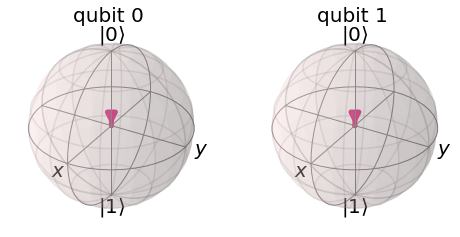

In [85]:
plot_bloch_multivector(R)

Above Qubit pair means entanglement and we do not knwo their state

#### Adding Measurement

DensityMatrix([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))


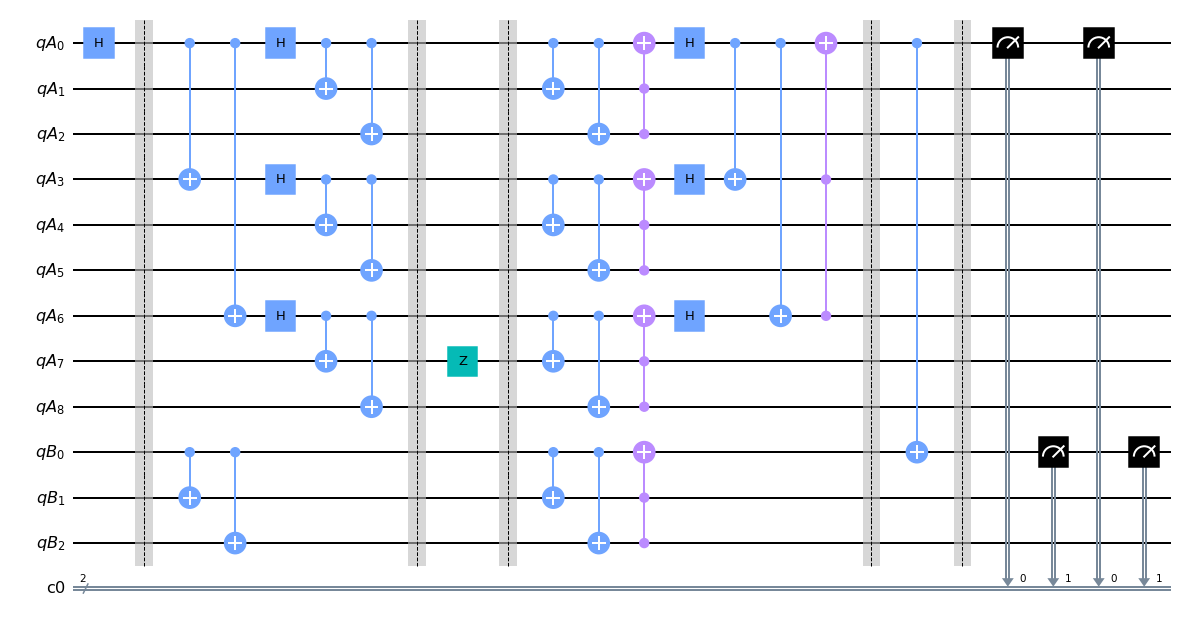

In [24]:
#Measurement of qA0 & qB0
qcircE.measure(0,0) #Measured output on classical bit1
qcircE.measure(9,1) #Measured output on classical bit2

sim = Aer.get_backend('statevector_simulator') #Choosing the StateVector Simulator
job = execute(qcircE, sim) #Executing the circuit on simulator
v = job.result().get_statevector() #Collecting the statevector results
R = partial_trace(v, [1, 2, 3, 4, 5, 6, 7, 8, 10, 11]) #Tracing out all qubits except qA0 (0) & qB0 (9)
print(R)
# for amplitude in v:
#     print(amplitude)
qcircE.draw(output='mpl') #Draw the circuit

#### Plotting Bloch Sphere

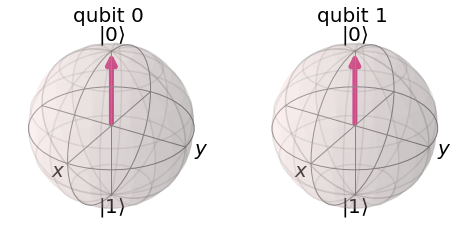

In [25]:
plot_bloch_multivector(R)

## Running the Shor's Code Circuit on Simulators

{'00': 511, '11': 513}


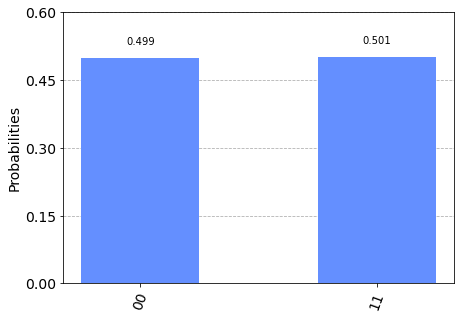

In [26]:
simE = Aer.get_backend('qasm_simulator') #Choosing the QASM Simulator
job = execute(qcircE, simE, shots=1024) #Executing the circuit on simulator
result_sim = job.result() #Collecting results
counts = result_sim.get_counts(qcircE) #Counting the frequency of each result
print(counts) 
plot_histogram(counts)

#### The above Shor's circuit can been to produced the final state $\dfrac{(|00>+|11>)}{\sqrt(2)}$ as can be seen from: 

1) Bloch Sphere

2) Simulated histogram counts

3) Reduced density matrix